# ref

- [그래프 머신러닝](https://product.kyobobook.co.kr/detail/S000200738068)

- [github](https://github.com/PacktPublishing/Graph-Machine-Learning)

# 커뮤니티와 같은 의미 있는 구조 감지

- 커뮤니티와 클러시트렁을 식별하는 방법

`-` 커뮤니티를 식별하기 위한 몇 가지 전략

- 비중첩 커뮤니티 감지 알고리즘: 노드와 커뮤니티 간의 일대일 연결을 제공하여 커뮤니티 간에 노드가 겹치지 않는다.

- 중첩 커뮤니티 감지 알고리즘: 노드가 둘 이상의 커뮤니티에 포함될 수 있도록 한다.

## 임베딩 기반 커뮤니티 감지

- 노드 임베딩에 얕은 클러스터링 기술 적용

- 임베딩 방법 사용시 노드 간의 유사성을 나타내는 거리를 정의하는 벡터 공간에 노드를 투영



1. 바벨 그래프 생성

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [3]:
import networkx as nx 
G = nx.barbell_graph(m1=10, m2=4) 

2. 임베딩 알고리즘(HOPE)를 사용해 감소된 밀집 노드 얻기

In [4]:
from gem.embedding.hope import HOPE 
gf = HOPE(d=4, beta=0.01) 
gf.learn_embedding(G) 
embeddings = gf.get_embedding() 

SVD error (low rank): 0.052092


3. 클러스터링 알고리즘 실행

In [7]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3, random_state=0) #.(embeddings)
labels = gm.fit_predict(embeddings)

4. 다양한 색상으로 강조 표시된 계산된 커뮤니티로 네트워크 그리기

```ptyhon
colors = ["blue", "green", "red"]

nx.draw_spring(G, node_color=[colors[label] for label in labels])
```

- 위 코드 자꾸 `'_AxesStack' object is not callable` 이렇게 오류가 난다. ㅇ

- 아래와 같이 그림이 표시되어야 함

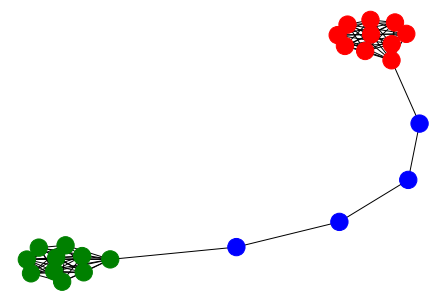

## 스펙트럼 방법 및 행렬 분해

- 스펙트럼 클러스터링: 라플라시안 행렬의 고유 벡터에 표준 클러스터링 알고리즘 적용

- 임베딩 기술이 라플라시안 행렬의 첫 번쨰 k-고유 벡터롤 고려해 얻은 스펙트럼 임베딩을 이용한 임베딩 기반 커뮤니티 탐지 알고리즘의 특별한 경우 (?)



In [13]:
#pip install communities

In [14]:
from communities.algorithms import spectral_clustering

adj=np.array(nx.adjacency_matrix(G).todense())

communities = spectral_clustering(adj, k=3)

/tmp/ipykernel_1863787/1958540878.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj=np.array(nx.adjacency_matrix(G).todense())


TypeError: '_AxesStack' object is not callable

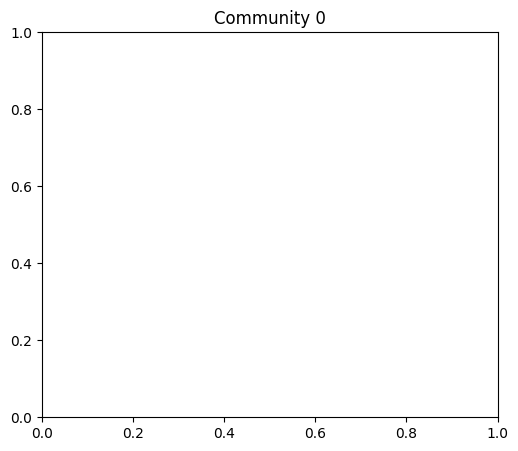

In [22]:
plt.figure(figsize=(20, 5))

for ith, community in enumerate(communities):
    cols = ["red" if node in community else "blue" for node in G.nodes]
    plt.subplot(1,3,ith+1)
    plt.title(f"Community {ith}")
    nx.draw_spring(G, node_color=cols)

- 그전에 nx.draw가 오류 날때는 nx.draw_networkx로 바꿔서 하니까 되긴 됬는데.. nx.darw_spinrg은 어떻게 해야하누..